In [2]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
maindf = pd.read_csv('../train.csv')
maindf.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [3]:
df3141 = maindf.iloc[:, 31:41]
df3141["SalePrice"] = maindf["SalePrice"]
print(df3141.columns)
df3141.tail()

Index(['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'SalePrice'],
      dtype='object')


,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,SalePrice
1455,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,175000
1456,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,210000
1457,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,266500
1458,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,142125
1459,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,147500


In [4]:
df3141_HeatingQC = pd.DataFrame(df3141, columns=['HeatingQC'])
df3141_HeatingQC['SalePrice'] = df3141['SalePrice'] 
df3141_f2 = df3141.groupby(['HeatingQC']).size().reset_index(name='Counts')
df3141_f2   #난방 품질 및 상태


,HeatingQC,Counts
0,Ex,741
1,Fa,49
2,Gd,241
3,Po,1
4,TA,428


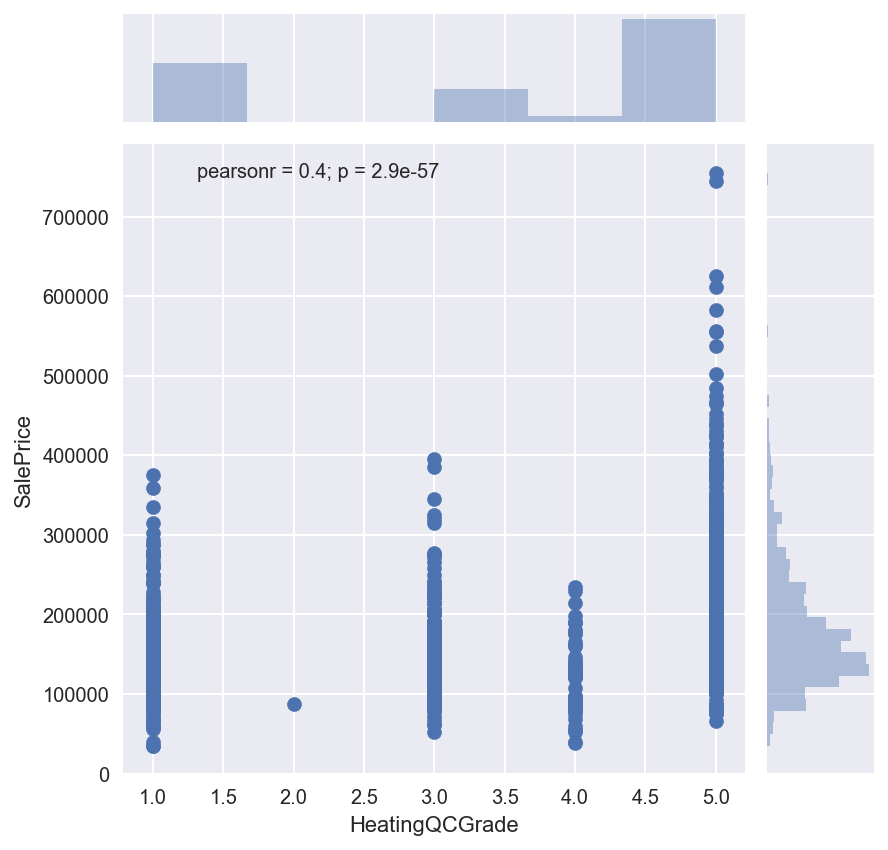

In [5]:
def HeatingQCgrade(data) :
    if data == 'Ex':
        return 5
    if data == 'Fa':
        return 4
    if data == 'Gd':
        return 3
    if data == 'Po':
        return 2
    if data == 'TA':
        return 1
    else:
        return 0
df3141_HeatingQC['HeatingQCGrade'] = df3141_HeatingQC['HeatingQC'].apply(HeatingQCgrade)
sns.jointplot(x="HeatingQCGrade", y="SalePrice", data=df3141_HeatingQC)

In [6]:
df3141_Heating = pd.DataFrame(df3141, columns=['Heating'])
df3141_Heating['SalePrice'] = df3141['SalePrice'] 
df3141_f2 = df3141.groupby(['Heating']).size().reset_index(name='Counts')
df3141_f2   #난방 품질 및 상태
#        Floor	Floor Furnace
#        GasA	Gas forced warm air furnace
#        GasW	Gas hot water or steam heat
#        Grav	Gravity furnace	
#        OthW	Hot water or steam heat other than gas
#        Wall	Wall furnace

,Heating,Counts
0,Floor,1
1,GasA,1428
2,GasW,18
3,Grav,7
4,OthW,2
5,Wall,4


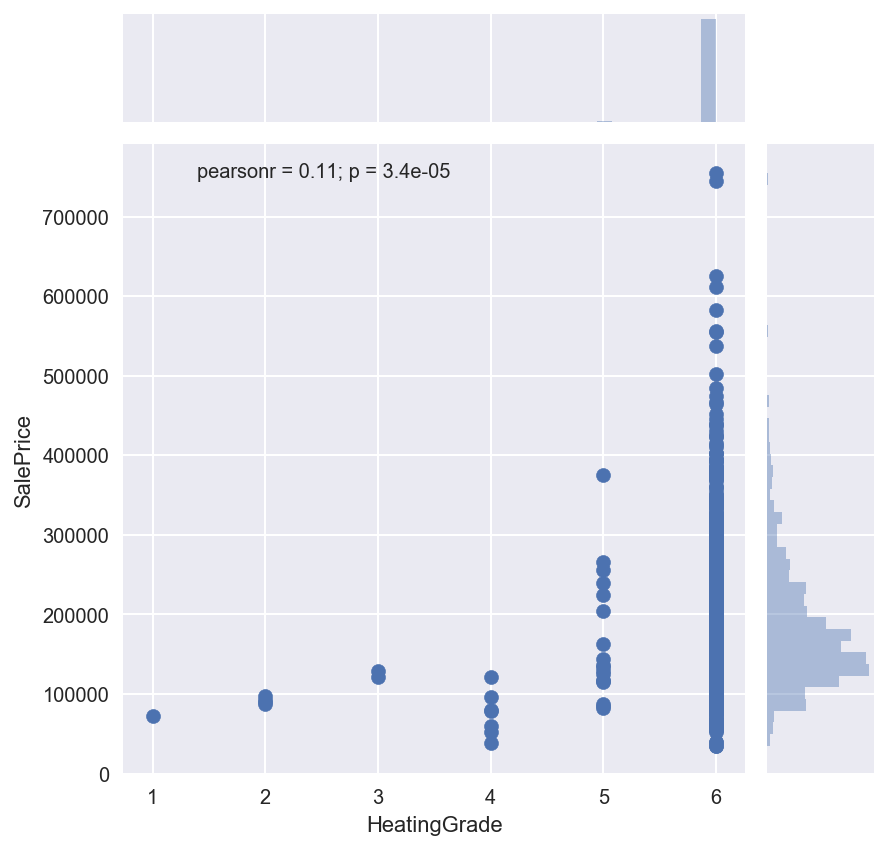

In [9]:
def Heatinggrade(data) :
    if data == 'Floor':
        return 1
    if data == 'GasA':
        return 6
    if data == 'GasW':
        return 5
    if data == 'Grav':
        return 4
    if data == 'OthW':
        return 3
    if data == 'Wall':
        return 2
    else:
        return 0
df3141_Heating['HeatingGrade'] = df3141_Heating['Heating'].apply(Heatinggrade)
sns.jointplot(x="HeatingGrade", y="SalePrice", data=df3141_Heating)

In [10]:
df3141_BsmtFinType2 = pd.DataFrame(df3141, columns=['BsmtFinType2'])
df3141_BsmtFinType2['SalePrice'] = df3141['SalePrice'] 
df3141_f2 = df3141.groupby(['BsmtFinType2']).size().reset_index(name='Counts')
df3141_f2  #지하실 완공 지역의 평가
#        GLQ	Good Living Quarters
#        ALQ	Average Living Quarters
#        BLQ	Below Average Living Quarters	
#        Rec	Average Rec Room
#        LwQ	Low Quality
#        Unf	Unfinshed
#        NA	No Basement

,BsmtFinType2,Counts
0,ALQ,19
1,BLQ,33
2,GLQ,14
3,LwQ,46
4,Rec,54
5,Unf,1256


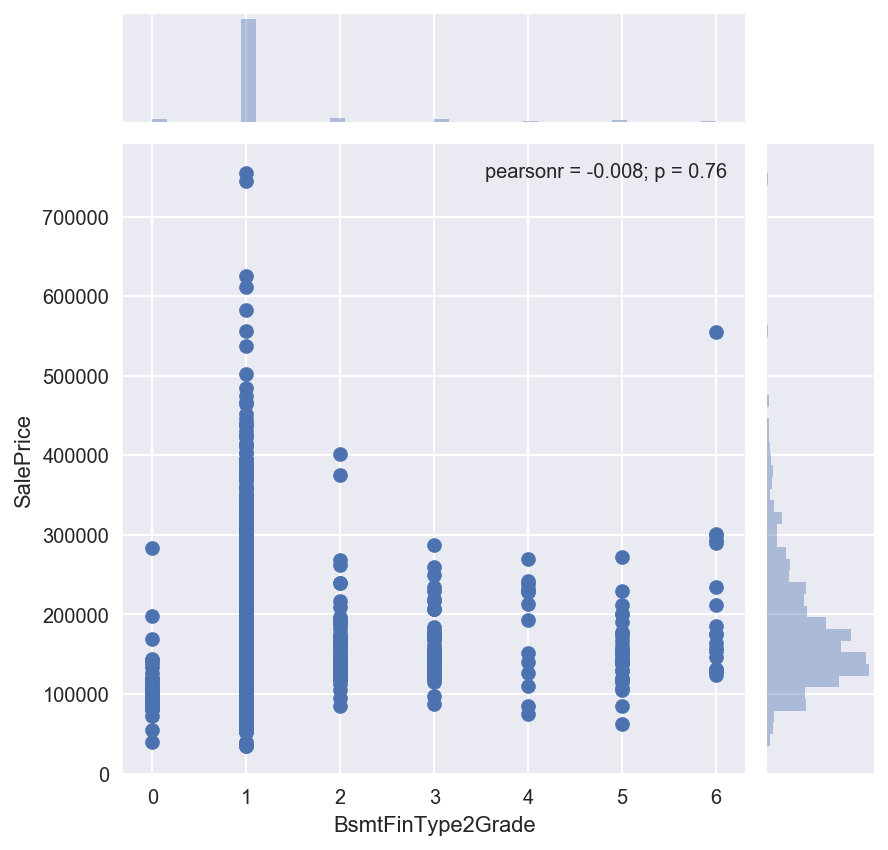

In [12]:
def BsmtFinType2grade(data) :
    if data == 'ALQ':
        return 6
    if data == 'BLQ':
        return 5
    if data == 'GLQ':
        return 4
    if data == 'LwQ':
        return 3
    if data == 'Rec':
        return 2
    if data == 'Unf':
        return 1
    else:
        return 0
df3141_BsmtFinType2['BsmtFinType2Grade'] = df3141_BsmtFinType2['BsmtFinType2'].apply(BsmtFinType2grade)
sns.jointplot(x="BsmtFinType2Grade", y="SalePrice", data=df3141_BsmtFinType2)

In [13]:
df3141_BsmtFinType1 = pd.DataFrame(df3141, columns=['BsmtFinType1'])
df3141_BsmtFinType1['SalePrice'] = df3141['SalePrice'] 
df3141_f2 = df3141.groupby(['BsmtFinType1']).size().reset_index(name='Counts')
df3141_f2  #지하실 완공 지역의 등급
#        GLQ	Good Living Quarters
#        ALQ	Average Living Quarters
#        BLQ	Below Average Living Quarters	
#        Rec	Average Rec Room
#        LwQ	Low Quality
#        Unf	Unfinshed
#        NA	No Basement

,BsmtFinType1,Counts
0,ALQ,220
1,BLQ,148
2,GLQ,418
3,LwQ,74
4,Rec,133
5,Unf,430


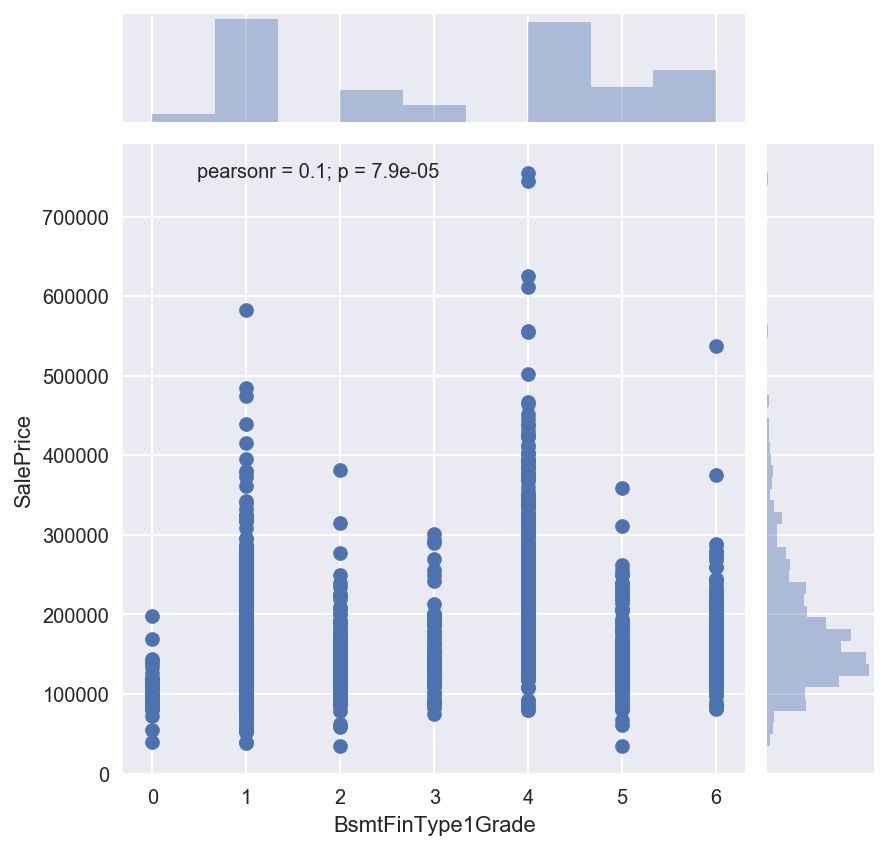

In [14]:
def BsmtFinType1grade(data) :
    if data == 'ALQ':
        return 6
    if data == 'BLQ':
        return 5
    if data == 'GLQ':
        return 4
    if data == 'LwQ':
        return 3
    if data == 'Rec':
        return 2
    if data == 'Unf':
        return 1
    else:
        return 0
df3141_BsmtFinType1['BsmtFinType1Grade'] = df3141_BsmtFinType1['BsmtFinType1'].apply(BsmtFinType1grade)
sns.jointplot(x="BsmtFinType1Grade", y="SalePrice", data=df3141_BsmtFinType1)

In [15]:
df3141_BsmtExposure = pd.DataFrame(df3141, columns=['BsmtExposure'])
df3141_BsmtExposure['SalePrice'] = df3141['SalePrice'] 
df3141_f2 = df3141.groupby(['BsmtExposure']).size().reset_index(name='Counts')
df3141_f2
#도보나 정원의 벽 상태
#        Gd	Good Exposure
#        Av	Average Exposure (split levels or foyers typically score average or above)	
#        Mn	Mimimum Exposure
#        No	No Exposure
#        NA	No Basement

,BsmtExposure,Counts
0,Av,221
1,Gd,134
2,Mn,114
3,No,953


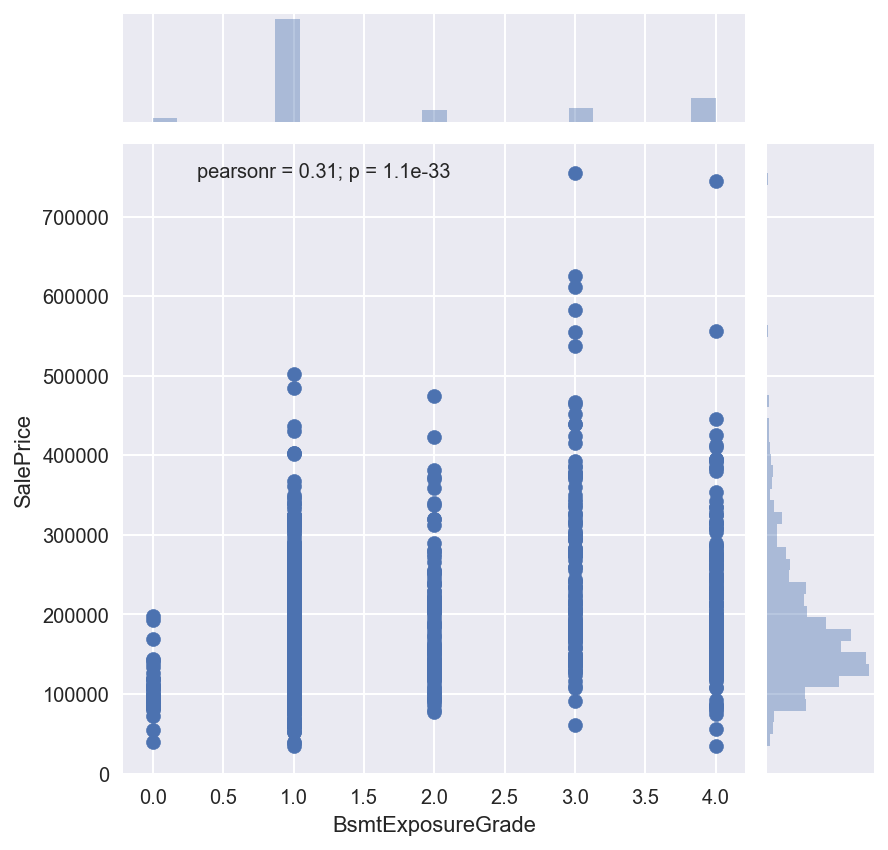

In [16]:
def BsmtExposuregrade(data) :
    if data == 'Av':
        return 4
    if data == 'Gd':
        return 3
    if data == 'Mn':
        return 2
    if data == 'No':
        return 1
    else:
        return 0
df3141_BsmtExposure['BsmtExposureGrade'] = df3141_BsmtExposure['BsmtExposure'].apply(BsmtExposuregrade)
sns.jointplot(x="BsmtExposureGrade", y="SalePrice", data=df3141_BsmtExposure)

In [17]:
df3141_BsmtCond = pd.DataFrame(df3141, columns=['BsmtCond'])
df3141_BsmtCond['SalePrice'] = df3141['SalePrice'] 
df3141_f2 = df3141.groupby(['BsmtCond']).size().reset_index(name='Counts')
df3141_f2

#지하싱 전반적 상태
#        Gd	Good
#        TA	Typical - slight dampness allowed
#        Fa	Fair - dampness or some cracking or settling
#        Po	Poor - Severe cracking, settling, or wetness

,BsmtCond,Counts
0,Fa,45
1,Gd,65
2,Po,2
3,TA,1311


C:\Users\hosua\Anaconda3\lib\site-packages\scipy\stats\stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\hosua\Anaconda3\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


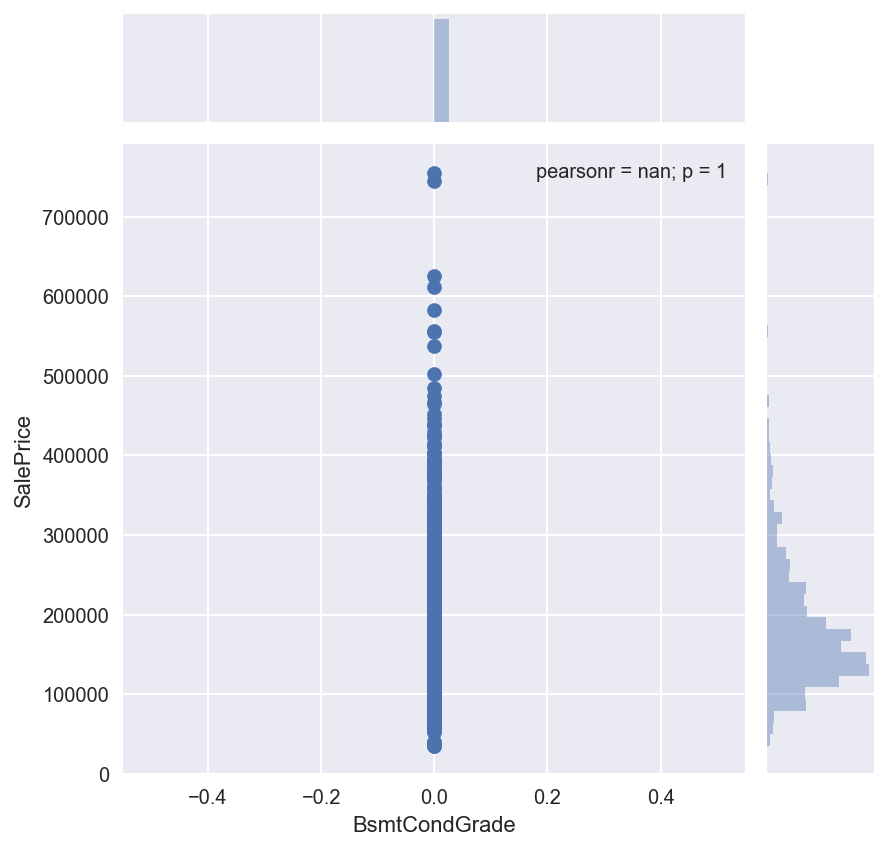

In [19]:
def BsmtCondgrade(data) :
    if data == 'Gd':
        return 4
    if data == 'TA':
        return 3
    if data == 'Fa':
        return 2
    if data == 'Po':
        return 1
    else:
        return 0
df3141_BsmtCond['BsmtCondGrade'] = df3141_BsmtCond['BsmtCond'].apply(BsmtCondgrade)
sns.jointplot(x="BsmtCondGrade", y="SalePrice", data=df3141_BsmtCond)